In [1]:
import pandas as pd

In [2]:
from random import choice 

In [3]:
import numpy as np

In [4]:
import math

In [44]:
from scipy import stats

In [6]:
pd.get_dummies(pd.DataFrame(board.reshape(1,42)))

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
board = [[0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0]]
def check_legal_moves(board):
    if check_for_winner(board) != 0:
        return([])
    else:
        legal_moves = []
        for col in range(7):
            row1 = (board[5][col] == 0)
            row2 = (board[4][col] == 0)
            row3 = (board[3][col] == 0)
            row4 = (board[2][col] == 0)
            row5 = (board[1][col] == 0)
            row6 = (board[0][col] == 0)
            if row1:
                legal_moves.append([5,col])
            elif row2:
                legal_moves.append([4,col])
            elif row3:
                legal_moves.append([3,col])
            elif row4:
                legal_moves.append([2,col])
            elif row5:
                legal_moves.append([1,col])
            elif row6:
                legal_moves.append([0,col])
        return(legal_moves)          

In [434]:
def some_good_moves(board):
    moves = check_legal_moves(board)
    bms = [[3, 4, 5, 7, 5, 4, 3],
           [4, 6, 8,10, 8, 6, 4],
           [5, 7,11,13,11, 7, 5],
           [5, 7,11,13,11, 7, 5],
           [4, 6, 8,10, 8, 6, 4],
           [3, 4, 5, 7, 5, 4, 3]]
    for move in check_legal_moves(board):
        r = move[0]
        c = move[1]
        l = bms[r][c]
        for a in range(l):
            moves.append(move)
    return(moves)
            

In [6]:
def check_for_winner(board):
    winner = 0
    #h
    for r in range(6):
        for c in range(4):
            if (board[r][c] != 0) &(board[r][c] == board[r][c+1]) & (board[r][c] == board[r][c+2]) &(board[r][c] == board[r][c+3]):
                winner = board[r][c]
    #v
    for c in range(7):
        for r in range(3):
            if (board[r][c] != 0) &(board[r][c] == board[r+1][c]) & (board[r][c] == board[r+2][c]) &(board[r][c] == board[r+3][c]):
                winner = board[r][c]
    #d
    for r in range(3):
        for c in range(4):
            if (board[r][c] != 0) &(board[r][c] == board[r+1][c+1]) & (board[r][c] == board[r+2][c+2]) &(board[r][c] == board[r+3][c+3]):
                winner = board[r][c]
    for r in range(3):
        for c in range(4):
            if (board[5-r][c] != 0) &(board[5-r][c] == board[4-r][c+1]) & (board[5-r][c] == board[3-r][c+2]) &(board[5-r][c] == board[2-r][c+3]):
                winner = board[5-r][c]
    return(winner)

In [333]:
def find_score(board,turn):
    bms = [[3, 4, 5, 7, 5, 4, 3],
               [4, 6, 8,10, 8, 6, 4],
               [5, 7,11,13,11, 7, 5],
               [5, 7,11,13,11, 7, 5],
               [4, 6, 8,10, 8, 6, 4],
               [3, 4, 5, 7, 5, 4, 3]]
    score = 0
    for i in range(6):
        for j in range(7):
            score+=bms[i][j]*board[i][j]
    
    for move in check_legal_moves(board):
        r = move[0]
        c = move[1]
        score+=bms[r][c]*(-turn)    
    return(score)

In [173]:
board = [[ 0, 0, 0, 0, 0, 0, 0],
         [ 0,-1, 1, 1, 1, 0, 0],
         [ 0, 1, 1,-1,-1, 0, 0],
         [ 0,-1,-1,-1, 1, 1,-1],
         [ 0, 1, 1,-1, 1,-1, 1],
         [ 1, 1,-1, 1, 1, 1,-1]]
find_score(board,1)

-16

In [221]:
def minmax(board,depth,turn):
    #if game ends in a draw, score = 0
    if check_legal_moves(board) == []:
        return(0)
    #if someone wins, score = + or - 1000
    if check_for_winner(board) != 0:
        return(1000*(-turn))
    #check bms to approximate best move
    if (depth == 0):
        return(find_score(board,turn))
    if turn == 1:
        bscore = -1000
        for move in check_legal_moves(board):
            board[move[0]][move[1]] = turn
            score = minmax(board,depth-1,-turn)
            board[move[0]][move[1]] = 0
            bscore = max(score,bscore)
        return(bscore)
    else:
        bscore = 1000
        for move in check_legal_moves(board):
            board[move[0]][move[1]] = turn
            score = minmax(board,depth-1,-turn)
            board[move[0]][move[1]] = 0
            bscore = min(score,bscore)
        return(bscore)

In [225]:
def best_move(board,depth,turn):
    scores = []
    moves = check_legal_moves(board)
    for move in moves:
        r=move[0]
        c=move[1]
        board[r][c] = turn
        score = minmax(board,depth,-turn)
        board[r][c] = 0
        scores.append(score)
    if turn == 1:
        bmove = moves[scores.index(max(scores))]
    else:
        bmove = moves[scores.index(min(scores))]
    return(bmove)

In [218]:
board = [[ 0, 0, 0, 1, 0, 0, 0],
         [ 0, 0, 0, 1, 0, 0, 0],
         [ 0, 0, 0,-1,-1, 1, 0],
         [ 0, 0,-1, 1, 1,-1, 0],
         [ 0, 1, 1,-1,-1,-1, 0],
         [ 0, 1,-1, 1, 1,-1, 0]]
best_move(board,7,1)

[5, 0]
[3, 1]
[2, 2]
[1, 4]
[1, 5]
[5, 6]
[-35, -20, -19, -23, -29, -1000]


[2, 2]

In [435]:
board = [[ 0, 0, 0, 1, 0, 0, 0],
         [ 0, 0, 0, 1, 0, 0, 0],
         [ 0, 0, 0,-1,-1, 1, 0],
         [ 0, 0,-1, 1, 1,-1, 0],
         [ 0, 1, 1,-1,-1,-1, 0],
         [ 0, 1,-1, 1, 1,-1, 0]]
some_good_moves(board)

[[5, 0],
 [3, 1],
 [2, 2],
 [1, 4],
 [1, 5],
 [5, 6],
 [5, 0],
 [5, 0],
 [5, 0],
 [3, 1],
 [3, 1],
 [3, 1],
 [3, 1],
 [3, 1],
 [3, 1],
 [3, 1],
 [2, 2],
 [2, 2],
 [2, 2],
 [2, 2],
 [2, 2],
 [2, 2],
 [2, 2],
 [2, 2],
 [2, 2],
 [2, 2],
 [2, 2],
 [1, 4],
 [1, 4],
 [1, 4],
 [1, 4],
 [1, 4],
 [1, 4],
 [1, 4],
 [1, 4],
 [1, 5],
 [1, 5],
 [1, 5],
 [1, 5],
 [1, 5],
 [1, 5],
 [5, 6],
 [5, 6],
 [5, 6]]

In [436]:
def test_model(ra,depth):
    dfs = []
    print('cpu first')
    for i in range(ra):
        moves = []
        board = [[0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0]]
        move_numbers = []
        for i in range(21):  
            if check_legal_moves(board)==[]:
                result = 0
                break
            else:
                m = best_move(board,depth,1)
                r = m[0]
                c = m[1]
                board[r][c]=1
                if check_for_winner(board)==1:
                    result = 1
                    break
                b = board.copy()
                m = choice(some_good_moves(board))
                board[m[0]][m[1]] = -1
                move_numbers.append(i)
                move = [0,0,0,0,0,0,0]
                move[m[1]]=1
                b.append(move)
                b = np.asarray(b).reshape(49).tolist()
                moves.append(b)
                if check_for_winner(board)==-1:
                    result = -1
                    break
        df = pd.DataFrame(moves)
        df['Winner'] = result
        df["move"] = move_numbers
        dfs.append(df)
    print('u first')
    for i in range(ra):
        moves = []
        board = [[0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0]]
        move_numbers = []
        for i in range(21):
            if check_legal_moves(board)==[]:
                result = 0
                break
            else:
                b = board.copy()
                m = choice(some_good_moves(board))
                board[m[0]][m[1]] = -1
                move_numbers.append(i)
                move = [0,0,0,0,0,0,0]
                move[m[1]]=1
                b.append(move)
                b = np.asarray(b).reshape(49).tolist()
                moves.append(b)
                if check_for_winner(board)==-1:
                    result = -1
                    break
                m = best_move(board,depth,1)
                r = m[0]
                c = m[1]
                board[r][c]=1
                if check_for_winner(board)==1:
                    result = 1
                    break   
        df = pd.DataFrame(moves)
        df['Winner'] = result
        df["move"] = move_numbers
        dfs.append(df)
    data = pd.concat(dfs)
    return(data)

In [439]:
data = test_model(500,10)
data

cpu first
u first


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,Winner,move
0,0,0,0,0,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,-1,0,0,0,0,1,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,-1,0,0,0,0,0,1,0,1,2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0,0,0,0,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,1,1,3
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,-1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,-1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,-1,2


In [440]:
data.loc[data['move']==0]['Winner'].value_counts()

 1    807
-1    193
Name: Winner, dtype: int64

In [396]:
import matplotlib.pyplot as plt
import seaborn as sns

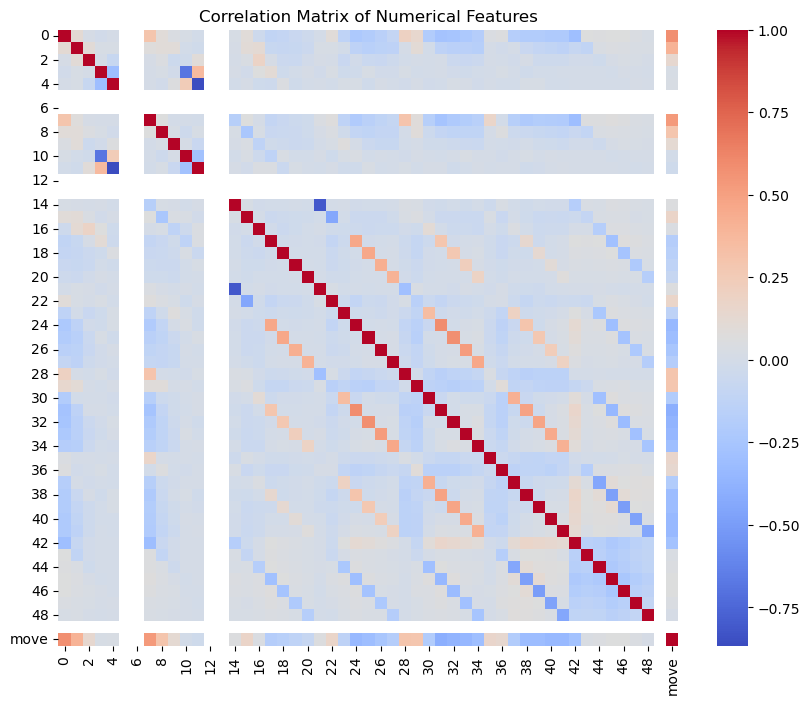

In [448]:

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()